In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import math

In [10]:
def readData(file):
    df = pd.read_csv(file, sep="\s+", 
                    header=None, 
                    names=["jahr","anzahl"],
                    decimal=",")
    return df

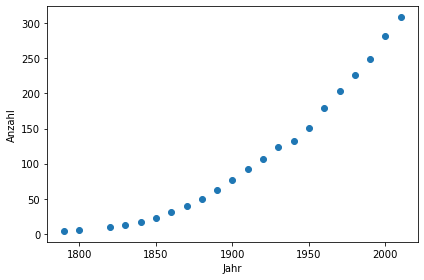

In [11]:
data = readData('sr_aufg_2_35.txt')
fig, ax = plt.subplots()

ax.set_ylabel('Anzahl')
ax.set_xlabel('Jahr')
ax.scatter(data['jahr'], data['anzahl'])
fig.tight_layout()
plt.show()


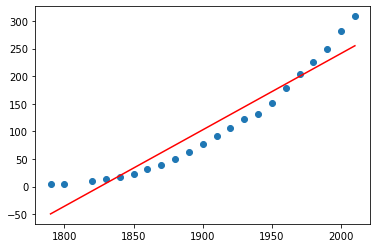

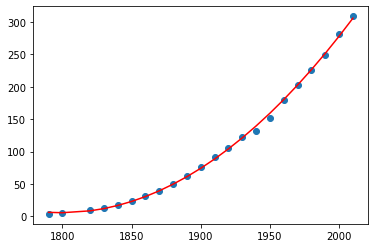

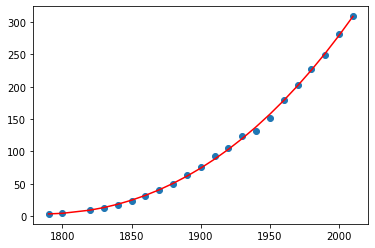

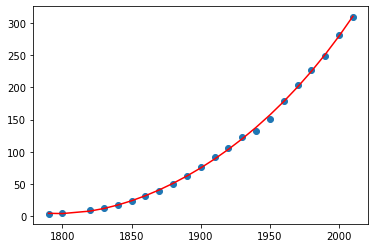

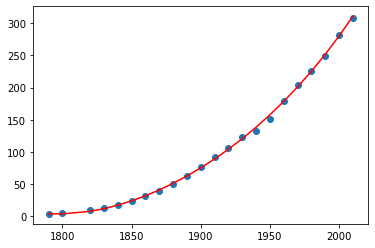

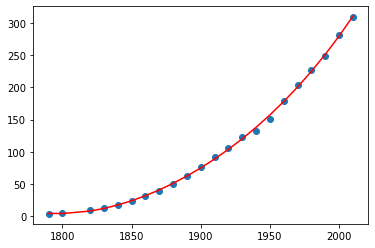

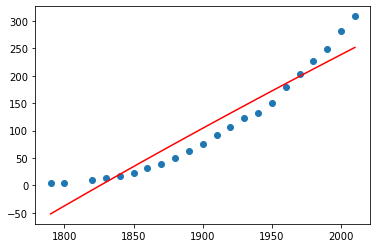

In [39]:
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
# coefficients
coef = linear_regressor.coef_
# coefficient of determination
r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Degree 2
pol_reg_deg_2 = PolynomialFeatures(degree=2, include_bias=False)
deg_2_features = pol_reg_deg_2.fit_transform(X)
deg_2_model = LinearRegression()
deg_2_model.fit(deg_2_features, Y)
Y_pred = deg_2_model.predict(deg_2_features)
# coefficients
deg_2_coef = deg_2_model.coef_
# coefficient of determination
deg_2_r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


# Degree 3
pol_reg_deg_3 = PolynomialFeatures(degree=3, include_bias=False)
deg_3_features = pol_reg_deg_3.fit_transform(X)
deg_3_model = LinearRegression()
deg_3_model.fit(deg_3_features, Y)
Y_pred = deg_3_model.predict(deg_3_features)
# coefficients
deg_3_coef = deg_3_model.coef_
# coefficient of determination
deg_3_r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Degree 4
pol_reg_deg_4 = PolynomialFeatures(degree=4, include_bias=False)
deg_4_features = pol_reg_deg_4.fit_transform(X)
deg_4_model = LinearRegression()
deg_4_model.fit(deg_4_features, Y)
Y_pred = deg_4_model.predict(deg_4_features)
# coefficients
deg_4_coef = deg_4_model.coef_
# coefficient of determination
deg_4_r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Degree 5
pol_reg_deg_5 = PolynomialFeatures(degree=5, include_bias=False)
deg_5_features = pol_reg_deg_5.fit_transform(X)
deg_5_model = LinearRegression()
deg_5_model.fit(deg_5_features, Y)
Y_pred = deg_5_model.predict(deg_5_features)
# coefficients
deg_5_coef = deg_5_model.coef_
# coefficient of determination
deg_5_r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# Degree 6
pol_reg_deg_6 = PolynomialFeatures(degree=6, include_bias=False)
deg_6_features = pol_reg_deg_6.fit_transform(X)
deg_6_model = LinearRegression()
deg_6_model.fit(deg_6_features, Y)
Y_pred = deg_6_model.predict(deg_6_features)
# coefficients
deg_6_coef = deg_6_model.coef_
# coefficient of determination
deg_6_r2 = r2_score(Y, Y_pred)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x = np.array(data['jahr'])
y = np.array(data['anzahl'])

# logarithmic regression
def log_func(x, a, b):
    return a * np.log(x) - b

popt , pcov = curve_fit(log_func, x, y)
log_y_pred = log_func(x, *popt)
log_r2 = r2_score(y, log_y_pred)
plt.scatter(x, y)
plt.plot(x, log_y_pred, color='red')
plt.show()

# # exponential regression
# def exp_func(x, a, b):
#     return a * np.exp(b * x)

# popt , pcov = curve_fit(exp_func, x, y)
# exp_y_pred = exp_func(x, *popt)
# exp_r2 = r2_score(y, exp_y_pred)
# plt.scatter(x, y)
# plt.plot(x, exp_y_pred, color='red')
# plt.show()


In [50]:
# Create Table
# Regression Type | Coefficient | R2
# ----------------|-------------|----
# Linear          | {coef}     | {r2}
# Degree 2        | {deg_2_coef} | {deg_2_r2}
# Degree 3        | {deg_3_coef} | {deg_3_r2}
# Degree 4        | {deg_4_coef} | {deg_4_r2}
# Degree 5        | {deg_5_coef} | {deg_5_r2}
# Degree 6        | {deg_6_coef} | {deg_6_r2}
# Logarithmic     | {log_coef}  | {log_r2}

coef_list = coef.tolist()[0]
deg_2_coef_list = deg_2_coef[0]
deg_3_coef_list = deg_3_coef[0]
deg_4_coef_list = deg_4_coef[0]
deg_5_coef_list = deg_5_coef[0]
deg_6_coef_list = deg_6_coef[0]

table = pd.DataFrame(columns=['Regression Type', 'Coefficient', 'R2'],)
table.loc[0] = ['Linear', coef, r2]
table.loc[1] = ['Degree 2', deg_2_coef, deg_2_r2]
table.loc[2] = ['Degree 3', deg_3_coef, deg_3_r2]
table.loc[3] = ['Degree 4', deg_4_coef, deg_4_r2]
table.loc[4] = ['Degree 5', deg_5_coef, deg_5_r2]
table.loc[5] = ['Degree 6', deg_6_coef, deg_6_r2]
table.loc[6] = ['Logarithmic', popt, log_r2]

print(table)
# prection for 2020
# linear
x = 2020
y_pred_linear = coef * x + linear_regressor.intercept_
print(y_pred_linear)
# degree 2
x = [[2020]]
deg2_pred = deg_2_model.predict(pol_reg_deg_2.fit_transform(x))
print(deg2_pred)
# degree 3
x = [[2020]]
deg3_pred = deg_3_model.predict(pol_reg_deg_3.fit_transform(x))
print(deg3_pred)
# degree 4
x = [[2020]]
deg4_pred = deg_4_model.predict(pol_reg_deg_4.fit_transform(x))
print(deg4_pred)
# degree 5
x = [[2020]]
deg5_pred = deg_5_model.predict(pol_reg_deg_5.fit_transform(x))
print(deg5_pred)
# degree 6
x = [[2020]]
deg6_pred = deg_6_model.predict(pol_reg_deg_6.fit_transform(x))
print(deg6_pred)
# logarithmic
x = 2020
log_pred = log_func(x, *popt)
print(log_pred)


TypeError: 'float' object is not subscriptable